In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv")
data_train.head(10)

In [ ]:
data_train["Sex"].replace(["female","male"],[0,1],inplace=True)
data_train.fillna(0,inplace=True)
data_train.head(10)

In [8]:
X_train = np.array(data_train[["Pclass","Sex","Age","SibSp","Parch","Fare"]])
Y_train = np.array(data_train[["Survived"]])

## Model

In [16]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(6,activation="sigmoid"), # input layer
                                    tf.keras.layers.Dense(20,activation="relu"), # hidden layer 1
                                    tf.keras.layers.Dense(8,activation="sigmoid"), # hidden layer 2
                                    tf.keras.layers.Dense(2,activation="softmax"), # output layer
                                    ])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [ ]:
output = model.fit(X_train,Y_train,epochs=100)

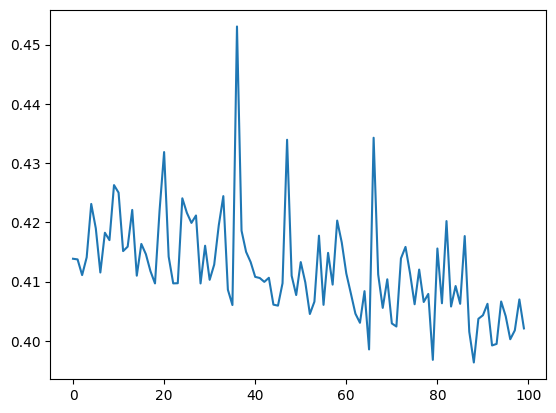

In [21]:
plt.plot(output.history["loss"])
plt.show()

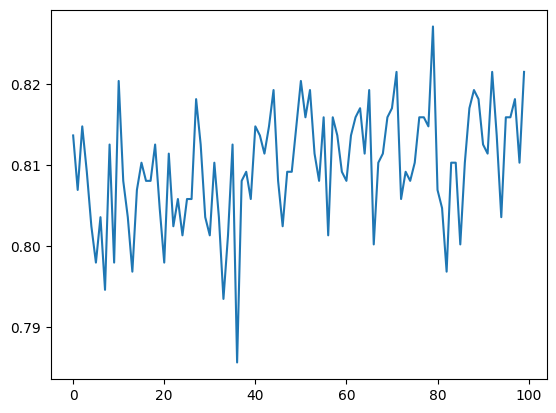

In [22]:
plt.plot(output.history["accuracy"])
plt.show()